In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import quad
from astropy import units as u

plt.rcParams['axes.grid'] = False
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams.update({"font.size": 11, "font.family": "serif"})


Matplotlib is building the font cache; this may take a moment.


In [2]:
df_P1 = pd.read_csv('sn-data.csv')

redshift = np.array(df_P1.iloc[:, 0])
dist_mod = np.array(df_P1.iloc[:, 1])
err_dist_mod = np.array(df_P1.iloc[:, 2])

df_P1.head()

,redshift,dist_mod,err_dist_mod
0,0.019200,34.491562,0.197092
1,0.033500,35.973833,0.170490
2,0.045295,36.640272,0.164981
3,0.380417,41.272341,0.198558
4,0.495000,42.118908,0.443653


C:\Users\javie\AppData\Local\Temp/ipykernel_6816/3239347858.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


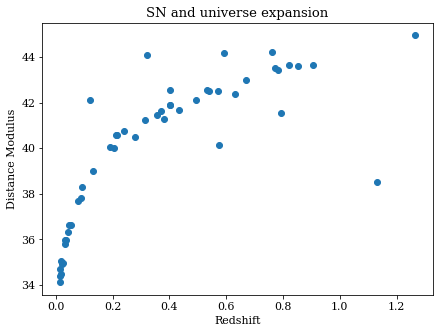

In [3]:
fig1, ax1 = plt.subplots(figsize=(7, 5))
ax1.scatter(redshift, dist_mod)
ax1.set_xlabel('Redshift')
ax1.set_ylabel('Distance Modulus')
ax1.set_title('SN and universe expansion')
fig1.show()

In [8]:
Omega_m = 0.27
Omega_lambda = 0.73
c = 300000*u.km/u.second  # km/s
H_0 = 71/(10**6)*u.kilometer/u.second/u.parsec
#H_0 = (H_0.to(1/u.second)).value
rate = ((c/H_0).to(u.parsec)).value
def mu_Peebles(z):
    def integral_fn(x):
        return 1/((Omega_m*(1 + x)**3 + Omega_lambda)**0.5)
    
    integral = quad(integral_fn, 0, z)[0]
    #print(integral)
    return -5*np.log10(10) + 5*np.log10((1 + z)*rate*integral)

vmu_Hubble = np.vectorize(mu_Peebles)

mu_model = vmu_Hubble(redshift)

C:\Users\javie\AppData\Local\Temp/ipykernel_6816/1200806295.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


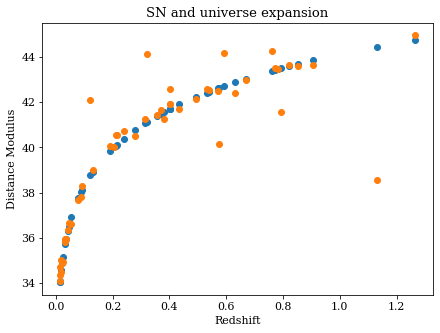

In [10]:
fig2, ax2 = plt.subplots(figsize=(7, 5))
ax2.scatter(redshift, mu_model)
ax2.scatter(redshift, dist_mod)
ax2.set_xlabel('Redshift')
ax2.set_ylabel('Distance Modulus')
ax2.set_title('SN and universe expansion')
fig2.show()